# CROSS VALIDATION

## To do: 

- make a 10-fold cross validation for the FSS (FSS_01) and FSI models for PO and KA too. 
- calculate log loss  

In [4]:
import pandas as pd 
import numpy as np
import sys
sys.path.append('..')
from bandits_helper_functions import*
from exponential_model import*
import warnings
from sklearn import metrics
import matplotlib.pyplot as plt 
import seaborn as sns
from paths import*

## Define paths, import data

In [25]:
paths = Paths()
fig_save_path = paths.fig_save_path + 'exponential_model/cross_validation/'

In [27]:
data = pd.read_excel(paths.data + 'behavioural_data.xlsx', index_col=[0], converters={'session': str})

## Data formatting
- Drop the trials where the monkey didn't make any choice
- Keep only a smaller subset with the relevant columns

In [9]:
data = data.loc[~data['feedback'].isnull()]
data_subset = data[['monkey', 'session', 'trial_id', 'block_id', 'best_target', 'target', 'feedback']]

## Split the data according to the subject

In [10]:
ka_data = data_subset.loc[data_subset['monkey'] == 'ka']
ka_data = get_shift_stay_variables(ka_data)

/Users/szekelyanna/Dropbox/CSNL/bandits/ipynbs/exponential_model/../bandits_helper_functions.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[0, '_shift'] = np.nan
/Users/szekelyanna/Dropbox/CSNL/bandits/ipynbs/exponential_model/../bandits_helper_functions.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[i, 'stay'] = 1


In [11]:
po_data = data_subset.loc[data_subset['monkey'] == 'po']
po_data = get_shift_stay_variables(po_data)

/Users/szekelyanna/Dropbox/CSNL/bandits/ipynbs/exponential_model/../bandits_helper_functions.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[0, '_shift'] = np.nan
/Users/szekelyanna/Dropbox/CSNL/bandits/ipynbs/exponential_model/../bandits_helper_functions.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.loc[i, 'stay'] = 0


## Assign alternative feedback coding columns

In [12]:
ka_data.loc[ka_data["feedback"] == 0, 'feedback_11'] = -1
ka_data.loc[ka_data["feedback"] == 1, 'feedback_11'] = 1
#ka_data_subset[['feedback', 'feedback_11']]
po_data.loc[po_data["feedback"] == 0, 'feedback_11'] = -1
po_data.loc[po_data["feedback"] == 1, 'feedback_11'] = 1
#po_data[['feedback', 'feedback_11']]

/var/folders/j5/sdcqcn450vj04kd1_kb4xv6c0000gn/T/ipykernel_64595/4212999555.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ka_data.loc[ka_data["feedback"] == 0, 'feedback_11'] = -1
/var/folders/j5/sdcqcn450vj04kd1_kb4xv6c0000gn/T/ipykernel_64595/4212999555.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  po_data.loc[po_data["feedback"] == 0, 'feedback_11'] = -1


#### Get the previous traials' feedback history & Calculate choice match weight (CMW)

In [13]:
ka_data_fb_01_cmw_11 = get_n_back(ka_data, reward_code='feedback')
ka_data_fb_01_cmw_11 = get_binary_choice_match_value(ka_data_fb_01_cmw_11, coding = '-11')

In [14]:
po_data_fb_01_cmw_11 = get_n_back(po_data, reward_code='feedback')
po_data_fb_01_cmw_11 = get_binary_choice_match_value(po_data_fb_01_cmw_11, coding = '-11')

----

# CROSS VALIDATE

In [15]:
warnings.filterwarnings("ignore")

## CROSS VALIDATE PO 

In [16]:
po_FSI_CV = Cross_Validate(po_data_fb_01_cmw_11, FSS = False)
po_FSI_CV_pred, po_FSI_CV_params, po_FSI_CV_ll = po_FSI_CV.cross_validate()

In [17]:
po_FSS_CV = Cross_Validate(po_data_fb_01_cmw_11, FSS = True)
po_FSS_CV_pred, po_FSS_CV_params, po_FSS_CV_ll = po_FSS_CV.cross_validate()

In [18]:
po_FSS_CV_ll, po_FSI_CV_ll

(0.1979039289633477, 0.39086440066689226)

## CROSS VALIDATE KA

In [19]:
ka_FSI_CV = Cross_Validate(ka_data_fb_01_cmw_11, FSS = False)
ka_FSI_CV_pred, ka_FSI_CV_params, ka_FSI_CV_ll = ka_FSI_CV.cross_validate()

In [20]:
ka_FSS_CV = Cross_Validate(ka_data_fb_01_cmw_11, FSS = True)
ka_FSS_CV_pred, ka_FSS_CV_params, ka_FSS_CV_ll = ka_FSS_CV.cross_validate()

In [21]:
ka_FSS_CV_ll, ka_FSI_CV_ll

(0.08985468551576119, 0.18395471603477742)

## PLOT THE RESULTS

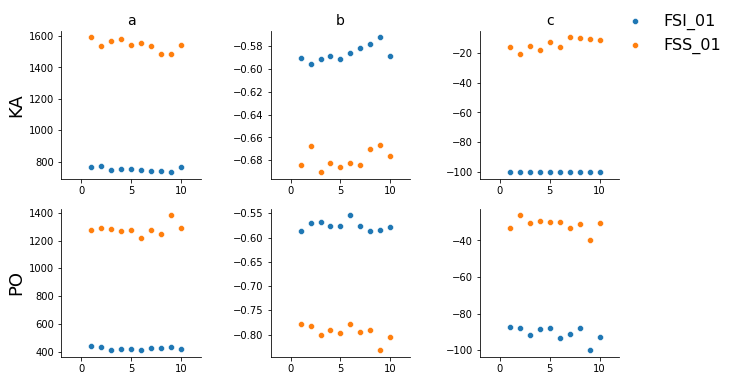

In [26]:
fig, ax = plt.subplots(2, 3, figsize = (10, 6), facecolor = 'white')
sns.despine()

c = 0
for param in ['a', 'b', 'c']:
    sns_plot = sns.scatterplot(ax = ax[0, c], data = pd.DataFrame(ka_FSI_CV_params), y= param, x = np.linspace(1, 10, 10), label = 'FSI_01')
    sns_plot.set_xlim(-2, 12)

    sns_plot = sns.scatterplot(ax = ax[0, c], data = pd.DataFrame(ka_FSS_CV_params), y= param, x = np.linspace(1, 10, 10), label = 'FSS_01')
    sns_plot.set_xlim(-2, 12)
    sns_plot.legend([], frameon = False)
    sns_plot.set_title(param, fontsize = 14)
    sns_plot.set_ylabel(None)
    #sns_plot.set_xticks([], [])
    

    sns_plot = sns.scatterplot(ax = ax[1, c], data = pd.DataFrame(po_FSI_CV_params), y= param, x = np.linspace(1, 10, 10), label = 'FSI_01')
    sns_plot.set_xlim(-2, 12)

    sns_plot = sns.scatterplot(ax = ax[1, c], data = pd.DataFrame(po_FSS_CV_params), y= param, x = np.linspace(1, 10, 10), label = 'FSS_01')
    sns_plot.set_xlim(-2, 12)
    sns_plot.legend([], frameon = False)
    sns_plot.set_ylabel(None)
    
    c +=1
    

ax[0, 0].set_ylabel('KA', fontsize = 18)
ax[1, 0].set_ylabel('PO', fontsize = 18)

plt.subplots_adjust(wspace = 0.5)
handles, labels = plt.gca().get_legend_handles_labels()

plt.legend(handles = handles, labels = labels, frameon = False, loc = (0.95, 2), fontsize = 16);
plt.savefig(fig_save_path + 'cross_validated_params.png', dpi = 300, bbox_inches='tight');